## Esercitazione 5  del    18 Marzo 2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [15]:
p = 1e+5
q=10.0**(-np.arange(11))
x = -p + np.sqrt(p**2 + q)

print("Spacing per p**2:", np.spacing(p**2),"\nvalori di q:",q)

#L'algoritmo non risulta stabile nel punto in cui q diventa piu piccolo dello spacing dei valori vicini a p**2, 
#Cosi risultera trascurabile e verra calcolato la formula x = -p + sqrt(p**2)=0
print(x)

#Per evitare cio dobbiamo mettere il valore di q in rapporto con p ed eliminando anche una operazione pericolosa come la sottrazione
#Questo puo essere fatto moltiplicando per (p+sqrt(p**2+q))/(p+sqrt(p**2+q))
#E otterremo 
x = q / (p + np.sqrt(p**2 + q))
print("Valori effettivi di x:", x)
#Questa funzione risultera molto piu stabile e corretta 

Spacing per p**2: 1.9073486328125e-06 
valori di q: [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Valori effettivi di x: [5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


# Esercizio 2

Si stabilisca se il problema relativo al calcolo della funzione $f(x)= \frac  {(1+x)-1 }  {x }$ per $x= 10^{-i }$ $  i=1,2,...,20$  risulta essere ben
condizionato per tutti i valori di x assegnati; verificare sperimentalmente la stabilità numerica dell'algoritmo di valutazione

In [29]:
fx = lambda x: ((1+x)-1)/x
x = np.array([10**(-x) for x in range(1,21)])

results = fx(x)
Ealgo = results-1

print('results=',results)

print('Ealgo=',Ealgo)

results= [1.000000000000001 1.000000000000001 0.99999999999989  0.99999999999989
 1.000000000006551 0.999999999917733 1.000000000583867 0.999999993922529
 1.000000082740371 1.000000082740371 1.000000082740371 1.000088900582341
 0.999200722162641 0.999200722162641 1.110223024625157 0.
 0.                0.                0.                0.               ]
Ealgo= [ 8.881784197001252e-16  8.881784197001252e-16 -1.101341240428155e-13
 -1.101341240428155e-13  6.551204023708124e-12 -8.226663794630440e-11
  5.838671768287895e-10 -6.077470970922150e-09  8.274037099909037e-08
  8.274037099909037e-08  8.274037099909037e-08  8.890058234101161e-05
 -7.992778373591136e-04 -7.992778373591136e-04  1.102230246251565e-01
 -1.000000000000000e+00 -1.000000000000000e+00 -1.000000000000000e+00
 -1.000000000000000e+00 -1.000000000000000e+00]


## Esercizio 3

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata.
- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

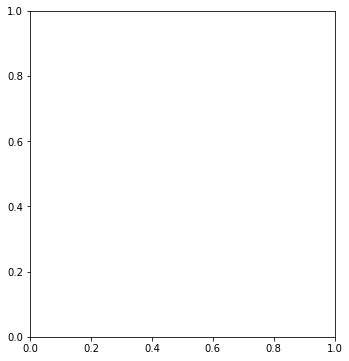

In [57]:
n = 9
b = [0 for x in range(0,n)]
s = [0 for x in range(0,n)]
p = [0 for x in range(0,n)]
b[0] = 2
s[0] = 1

for i in range(1,n):
    p[i] = b[i-1]*s[i-1]
    b[i] = 2 * b[i-1]
    s[i] = math.sqrt((1.0 - math.sqrt(1-s[i-1]**2))/2.0)

Err = np.abs(np.array(p) - math.pi)/math.pi

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(range(1, n), p, marker='o', linestyle='-', color='b')
plt.show()

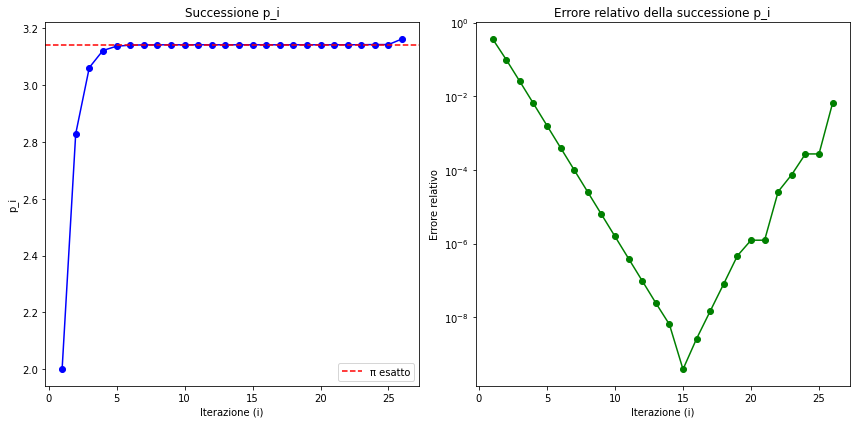

In [52]:
import math
import matplotlib.pyplot as plt

# Funzione per il metodo di Archimede
def archimede_pi(n):
    # Inizializzazione delle variabili
    b = [2.0]  # b[0] = 2
    s = [1.0]  # s[0] = 1
    p = []     # Successione p_i

    for i in range(1, n):
        # Calcolo di p[i]
        p_i = b[i-1] * s[i-1]
        p.append(p_i)

        # Aggiornamento di b[i] e s[i]
        b_i = 2 * b[i-1]
        s_i = math.sqrt((1.0 - math.sqrt(1 - s[i-1]**2)) / 2.0)

        b.append(b_i)
        s.append(s_i)

    return p

# Input dell'utente per il numero di iterazioni
n = int(input("Inserisci il numero di iterazioni (n): "))

# Calcolo della successione p_i
p = archimede_pi(n)

# Valore esatto di pi greco
pi_exact = math.pi

# Calcolo dell'errore relativo
relative_error = [abs((pi_i - pi_exact) / pi_exact) for pi_i in p]

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))

# Grafico della successione p_i
plt.subplot(1, 2, 1)
plt.plot(range(1, n), p, marker='o', linestyle='-', color='b')
plt.axhline(y=pi_exact, color='r', linestyle='--', label='π esatto')
plt.xlabel('Iterazione (i)')
plt.ylabel('p_i')
plt.title('Successione p_i')
plt.legend()

# Grafico dell'errore relativo
plt.subplot(1, 2, 2)
plt.plot(range(1, n), relative_error, marker='o', linestyle='-', color='g')
plt.xlabel('Iterazione (i)')
plt.ylabel('Errore relativo')
plt.title('Errore relativo della successione p_i')
plt.yscale('log')  # Scala logaritmica per visualizzare meglio l'errore

plt.tight_layout()
plt.show()

## Esercizio 4   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



## Esercizio 5
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

## Esercizio 6
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 7
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?




Si nota che al restringersi dell'intervallo in torno al punto x=2, 
in cui la funzione si annulla, si evidenzia l'instabilità dell'algoritmo 1
rispetto all' algoritmo di Horner che risulta più stabile. 
